In [3]:
import os
import sys
from pathlib import Path

sys.path.append(os.path.join(Path().resolve(), "../src/"))

from analyst import Analyst
from config import ModelConfig, TrainerConfig
from dataset_manager import load_dataset_manager
from model import load_model

/Users/tatsuyaishii/dev/clones/my-doc2vec/.venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
model_config = ModelConfig()
trainer_config = TrainerConfig(
    dataset_name="toydata-seq-lengths",
    model_dir="../cache/model",
    dataset_dir="../cache/dataset",
)

dataset_manager = load_dataset_manager(
    dataset_name=trainer_config.dataset_name,
    dataset_dir=trainer_config.dataset_dir,
    load_dataset=trainer_config.load_dataset,
    save_dataset=trainer_config.save_dataset,
    window_size=model_config.window_size,
)
model = load_model(
    dataset_manager=dataset_manager,
    trainer_config=trainer_config,
    model_config=model_config
)

load cached dataset_manager from: ../cache/dataset/toydata-seq-lengths.pickle
load_state_dict from: ../cache/model/toydata-seq-lengths/attentive.pt


In [5]:
analyst = Analyst(model, dataset_manager)

(<Figure size 1200x800 with 2 Axes>, <AxesSubplot: >)

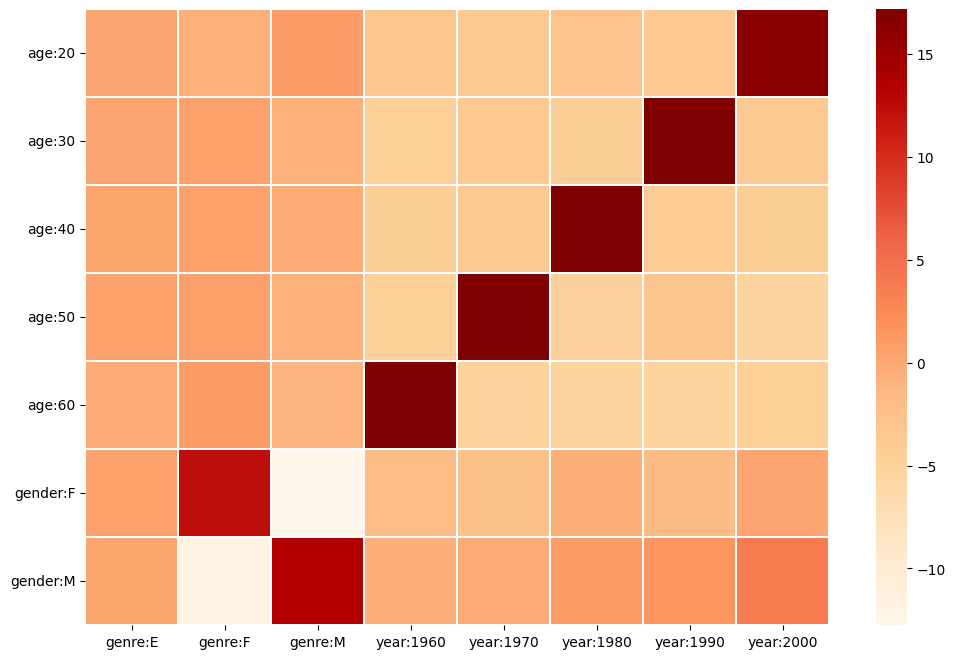

In [6]:
analyst.visualize_similarity_heatmap()

In [7]:
norms = {}

for i, (id, seq) in enumerate(dataset_manager.raw_sequences.items()):
    l = len(seq)
    if l not in norms:
        norms[l] = []
    norms[l].append(model.seq_embedding[i].norm().item())

In [24]:
x, y = [], []
x_means, y_means = [], []
for l, norm in norms.items():
    for v in norm:
        x.append(l - 20)
        y.append(v)
    x_means.append(l - 20)
    y_means.append(sum(norm) / len(norm))

([<matplotlib.axis.XTick at 0x2ba185ab0>,
 [Text(25, 0, '25'),
  Text(50, 0, '50'),
  Text(75, 0, '75'),
  Text(100, 0, '100')])

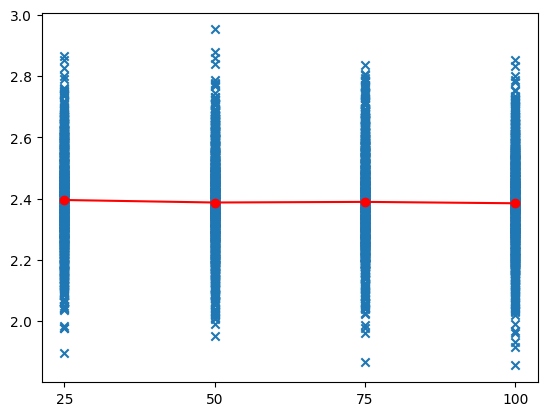

In [27]:
import matplotlib.pyplot as plt

plt.scatter(x, y, marker="x")
plt.plot(x_means, y_means, c="red", marker="o")
plt.xticks([25, 50, 75, 100])